## Review on basic Python data visualziation and data summary 

### Goal for today： 

- Review on basic data structure
- Understand basic rules to choose figure type
- Learn how to describe data and simple figures 
- Review basic plotting options in Python (matplotlib and seaborn)


### Describing a data set

In a data table (also called ``data matrix"), like the one below. There are two dimensions in the data: 

- Observations: each individual subject, case, or sample point (rows, represented with $n$)
- Variables/Feature: characteristics that are recorded for each subject in the sample (columns, represented with $p$)


In [3]:
import pandas as pd

df = pd.read_csv("ICUAdmissions.csv")
print(df.head())

   ID  Status  Age  Sex  Race  Service  Cancer  Renal  Infection  CPR  ...  \
0   8       0   27    1     1        0       0      0          1    0  ...   
1  12       0   59    0     1        0       0      0          0    0  ...   
2  14       0   77    0     1        1       0      0          0    0  ...   
3  28       0   54    0     1        0       0      0          1    0  ...   
4  32       0   87    1     1        1       0      0          1    0  ...   

   HeartRate  Previous  Type  Fracture  PO2  PH  PCO2  Bicarbonate  \
0         88         0     1         0    0   0     0            0   
1         80         1     1         0    0   0     0            0   
2         70         0     0         0    0   0     0            0   
3        103         0     1         1    0   0     0            0   
4        154         1     1         0    0   0     0            0   

   Creatinine  Consciousness  
0           0              1  
1           0              1  
2           0    

### Describing variables

There are at least two ways to describe variables:
		
By value type:
		
- Numerical variables: take on numerical values with meaning Mathematical operations like addition, etc. must make sense
- Categorical variables: take on names, categories, or labels Categories are sometimes represented by numbers...

By function:
		
- Response variable/Target: defined by the particular research question a study seeks to address, and measures the outcome of interest in the study
- Explanatory variable/Feature: a secondary variable(s) that explains changes in the response variable

### Important terminology clarification

- feature
- variable
- attribute

### In-class activities

Suppose my research question is "What factors may be related to the heart rate in ICU admissions?" Try to make three data viasualizations. 

Things you need to decide: 
- What features I want to choose for the data visualizaiton?
- What type of figures I will choose? 
- What information I want to achieve from the data visualization?
- ......


In [7]:
# Example 1: The distribution of heart rate

In [8]:
# Example 2: some plots heart rate vs. something
            #1. choose somehthing I believe there will be an effect
            #2. choose something give me a trend in the figure

In [9]:
# Example 3: 

### Basic data visualization choices

Here is a general guidline for the type of plots: 

- One categorical: bar plot 
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot (sankey diagram and treemap)

#### One categorical: bar plot

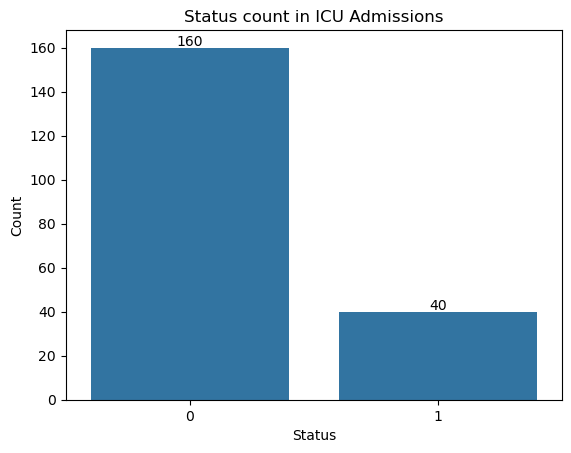

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = "Status", data = df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Status count in ICU Admissions')
status_counts = df['Status'].value_counts()

for i, value in enumerate(status_counts.values):
    plt.text(i, value+1, f'{value}', ha = 'center')

plt.show()

In [13]:
status_counts = df['Status'].value_counts()
status_counts

Status
0    160
1     40
Name: count, dtype: int64

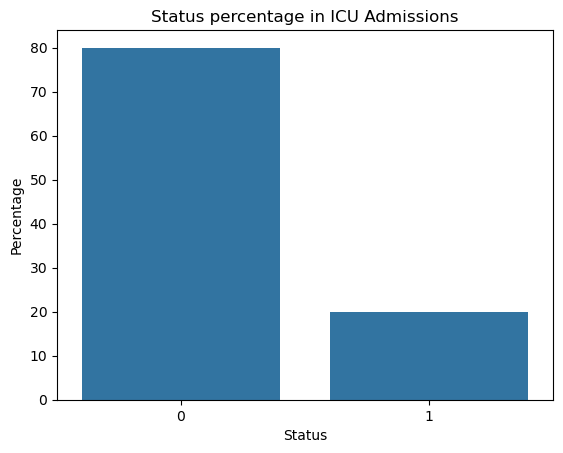

In [14]:
status_counts = df['Status'].value_counts(normalize = True)*100
status_counts

sns.barplot(x = status_counts.index, y = status_counts.values)
plt.xlabel('Status')
plt.ylabel('Percentage')
plt.title("Status percentage in ICU Admissions")
plt.show()

# for count plot we get one volumn of variable and helps us calculate how many vlaues for each of the group
# count plot input is only one column
# for bar plot, put in the value of 0 1 80 20, gives in 2x2 table

##### What to write about a bar plot

- what this plot is about? (what feature?)
- Percenrage/Count for each group
- Whether there is a clear difference on the percentage/count.


EX: The figure is about the number of people survived in the ICU Admissions. Status '0' means the patient has survived in the ICU while status '1' means the patient died in the ICU. Among the 200 patients, 160 (80%) of them survived while 40 (20%) of them died. Apprently there are more people survived in the ICU.  

#### One continous: histogram/density plot/boxplot

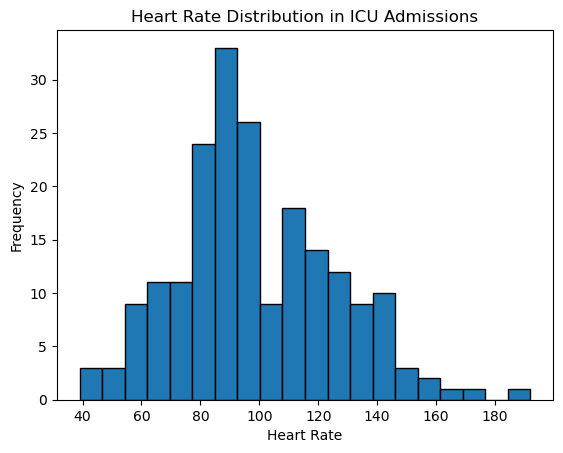

In [18]:
plt.hist(df['HeartRate'], bins = 20, edgecolor = 'black')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

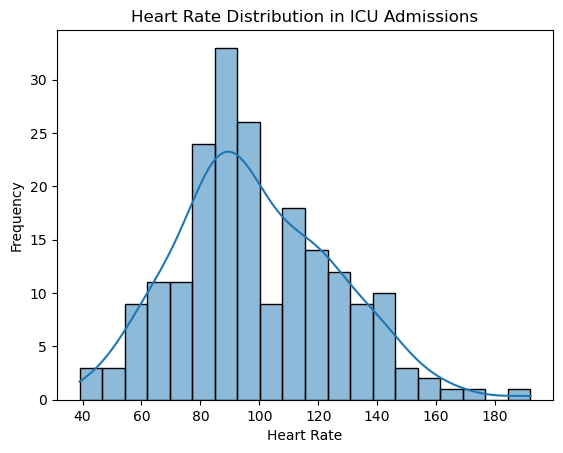

In [19]:
sns.histplot(df['HeartRate'], kde = True, bins = 20)
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

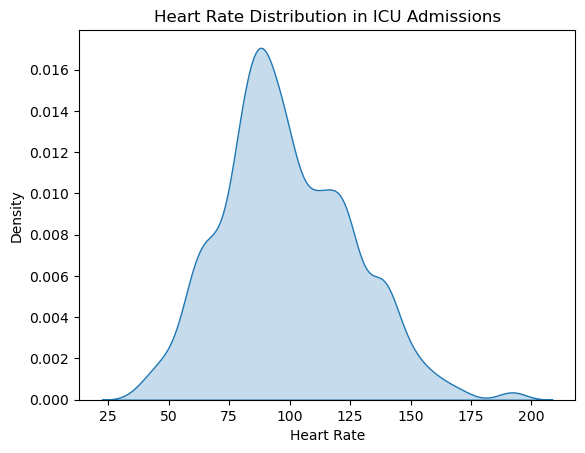

In [20]:
sns.kdeplot(df['HeartRate'], bw_adjust = 0.6, fill = True)
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

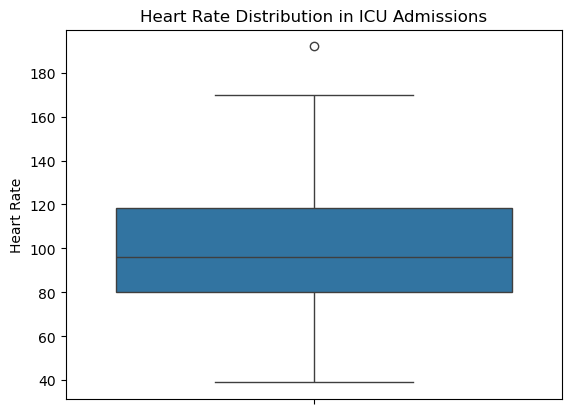

In [21]:
sns.boxplot(y = 'HeartRate', data =df)
plt.ylabel('Heart Rate')
plt.title('Heart Rate Distribution in ICU Admissions')
plt.show()

In [22]:
df['HeartRate'].describe()

count    200.00000
mean      98.92500
std       26.82962
min       39.00000
25%       80.00000
50%       96.00000
75%      118.25000
max      192.00000
Name: HeartRate, dtype: float64

##### Difference between histogram/density plot/ boxplot

- Histogram and density plot emphasizes on the distribution of the data
- Boxplot emphasizes on the statistics of the data (median, IQR)
- Boxplot cannot catch the distribution information(bi-mode)
- Histogram needs to choose the bin number and density plot needs to choose the bandwidth
- If you have multiple groups, boxplot and density plot can easily show the things side-by-side while histogram is hard to overlap with each other. 

##### Difference between histogram and bar plot

- Histogram is for numerical feature and bar plot is for categorical one
- Histogram almost always in veritical while bar plot can be horizonal
- Histogram usually does not have spaces between bars while bar plot will have
- Histogram's bar cannot change the order but bar plot's can


##### What to write about a histogram/density plot

- What the plot is about?
- Shape(skewness and mode)
- Majority of the data (typical value mean $\pm$ sd)
- Potential outliers


<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="700" height="300">

EX: The figure is about the distribution of heart rate among ICU Admissions. The heart rate has a uni-mode distribution and it is slightly skewed to the right (positively skewed), which means it may have a potential outlier with large values. The typical value is within the range of 98.9 $\pm$ 26.8. 

##### What to write about a box plot

- What the plot is about?
- Can also comment on the skewness but not the mode
- Majority of data (IQR)
- Potential outliers

EX: The figure is the boxplot of the hear rate distribution in ICU Admissions. It seems that the distribution is slightly skewed ot the right and it may have a potential outlier with large values. The IQR range is from 80 to 118.25.

#### Two continous: scatter plot

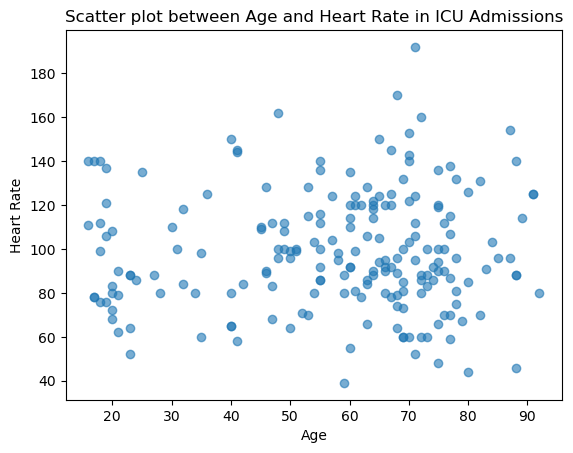

In [31]:
plt.scatter(df['Age'], df['HeartRate'], alpha = 0.6)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Scatter plot between Age and Heart Rate in ICU Admissions')
plt.show()

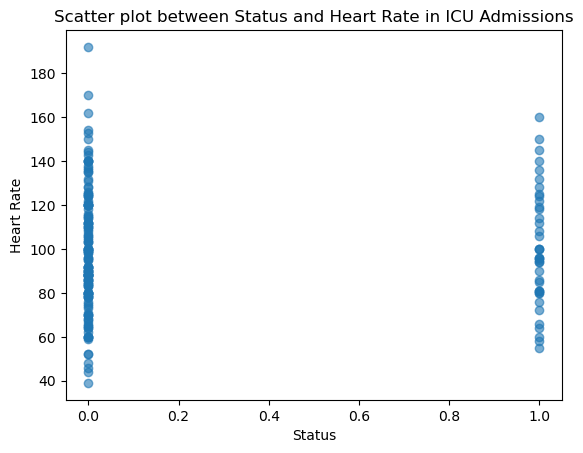

In [32]:
plt.scatter(df['Status'], df['HeartRate'], alpha = 0.6)
plt.xlabel('Status')
plt.ylabel('Heart Rate')
plt.title('Scatter plot between Status and Heart Rate in ICU Admissions')
plt.show()

##### What to write about a scatter plot

- What the plot is about?
- Trend (linear or non-linear)
- outlier? or cluster?


EX: the figure shows the relationship between age and heart rate among ICU Admissions. There is no clear linear or non-linear trend in the figure and there is no clear outlier. There might be a cluster for the age between 60-80 and heart rate from 100 to 120.

#### One categorical and one continous: side-by-side boxplot

Other choices include side-by-side histogram and side-by-side density plot

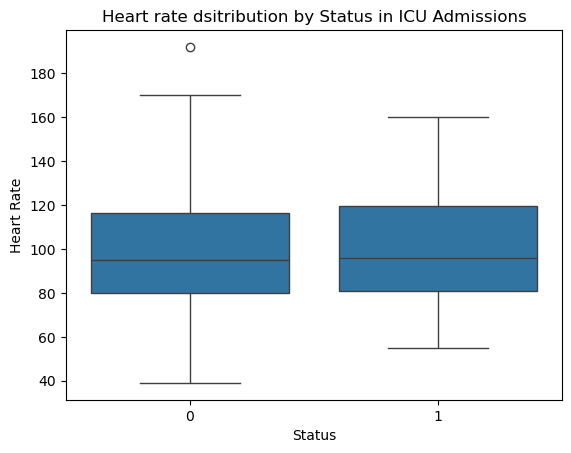

In [36]:
sns.boxplot(x = 'Status', y = 'HeartRate', data = df)
plt.xlabel('Status')
plt.ylabel('Heart Rate')
plt.title('Heart rate dsitribution by Status in ICU Admissions')
plt.show()

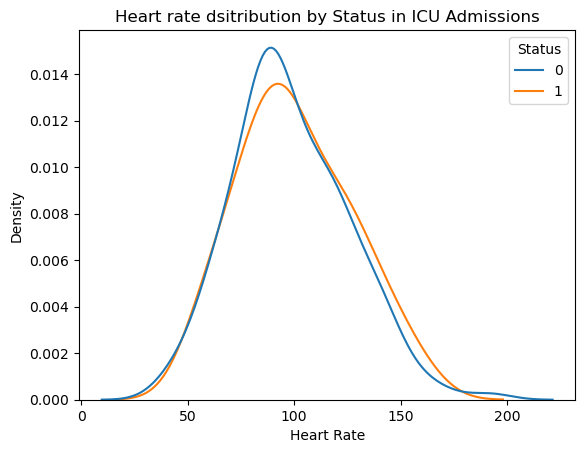

In [37]:
sns.kdeplot(x = 'HeartRate', hue = 'Status', data = df, common_norm = False)
plt.ylabel('Density')
plt.xlabel('Heart Rate')
plt.title('Heart rate dsitribution by Status in ICU Admissions')
plt.show()

##### What to write about a side-by-side boxplot or density plot

- What the plot is about?
- Highlight the comparison
- For the boxplot, declare whether the box parts are overlapped. 


EX. The figure is the side-by-side boxplot for Heart Rate vs. Status. The box parts are overlapped, thus there might not be a significant difference between two groups on Heart Rate distribution. 

#### Two categorical: side-by-side bar plot

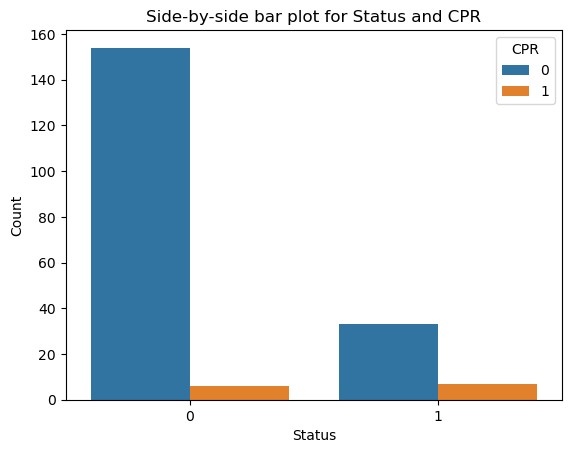

In [41]:
df['CPR'] = df['CPR'].astype('str')
sns.countplot (x = 'Status', hue = 'CPR', data = df)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Side-by-side bar plot for Status and CPR')
plt.show()

In [70]:
#proportion_table = pd.crosstab(df['Status'], df['CPR'])
# proportion_table = pd.crosstab(df['Status'], df['CPR'], normalize = 'all') ## everything equals to 1
proportion_table = pd.crosstab(df['Status'], df ['CPR'], normalize = 'index') ## each row equals 1
proportion_table

CPR,0,1
Status,,
0,0.9625,0.0375
1,0.8250,0.1750


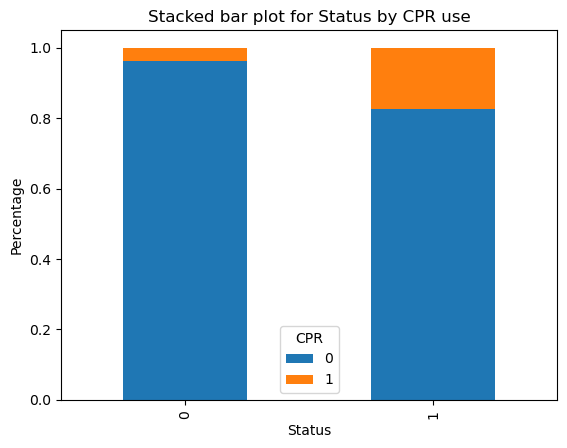

In [72]:
proportion_table.plot(kind = 'bar', stacked = True)
plt.xlabel ('Status')
plt.ylabel('Percentage')
plt.title('Stacked bar plot for Status by CPR use')
plt.show()

##### What to write about a side-by-side bar plot

- what the plot is about
- highlight the difference

EX: The figure is a stacked bar plot beteween patient status and their CPR use in the ICU admissions. The color indicates whether the patient has been used for CPR in the ICU. IN the figure, the distribution of CPR use is different for the survival group and non-survival group. There are much higher percentage of people who has survived that have not used the CPR.It seems that there is a correlation between the survival rate and CPR use but does not show that one causes the other.

### In-class activities: Try to make data visualizaiton by yourself

See the data with about Titanic. Try to make three data visualization to study how other features affect the "survived" (whether the person survived from the Titanic disaster). Once you finish, show your figures to the neighbors and describe the figures to them. 

Note: This is not a complete data, feel free to remove the missing valuesv(or do any other data pre-processing) before you making the plots. 

In [80]:
titanic_data = sns.load_dataset('titanic')
print(titanic_data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


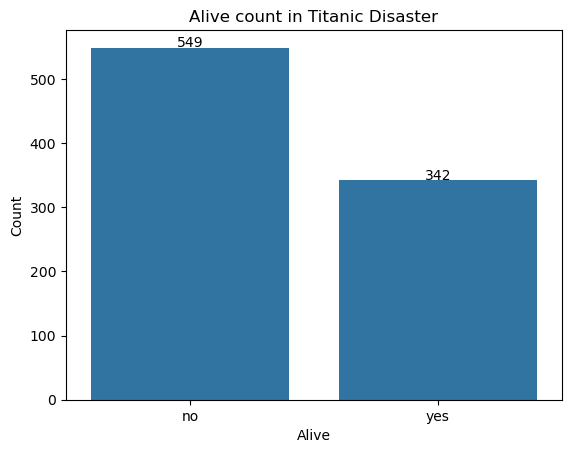

In [82]:
sns.countplot(x = "alive", data = titanic_data)
plt.xlabel('Alive')
plt.ylabel('Count')
plt.title('Alive count in Titanic Disaster')
alive_counts = titanic_data['alive'].value_counts()

for i, value in enumerate(alive_counts.values):
    plt.text(i, value+1, f'{value}', ha = 'center')

plt.show()

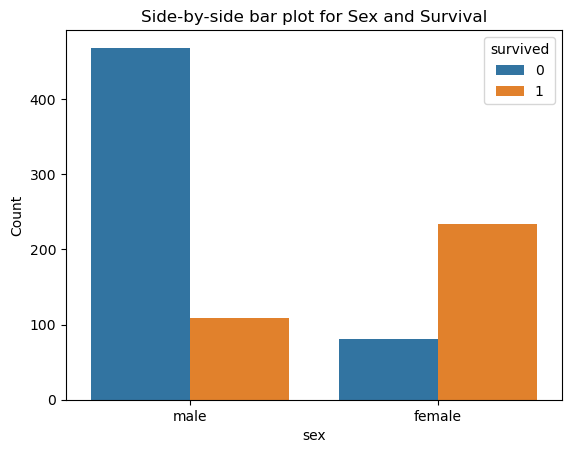

In [88]:
titanic_data['survived'] = titanic_data['survived'].astype('str')
sns.countplot (x = 'sex', hue = 'survived', data = titanic_data)
plt.xlabel('sex')
plt.ylabel('Count')
plt.title('Side-by-side bar plot for Sex and Survival')
plt.show()

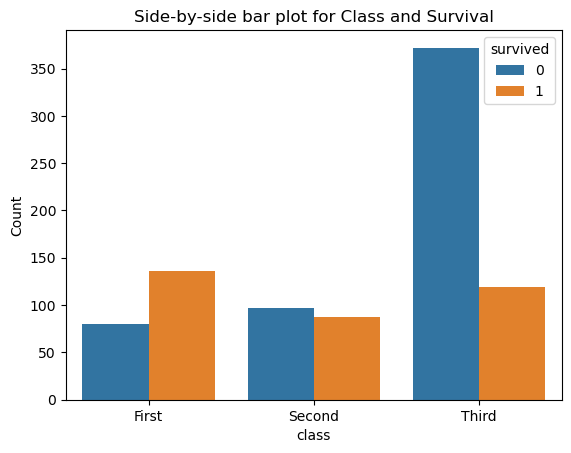

In [90]:
titanic_data['survived'] = titanic_data['survived'].astype('str')
sns.countplot (x = 'class', hue = 'survived', data = titanic_data)
plt.xlabel('class')
plt.ylabel('Count')
plt.title('Side-by-side bar plot for Class and Survival')
plt.show()

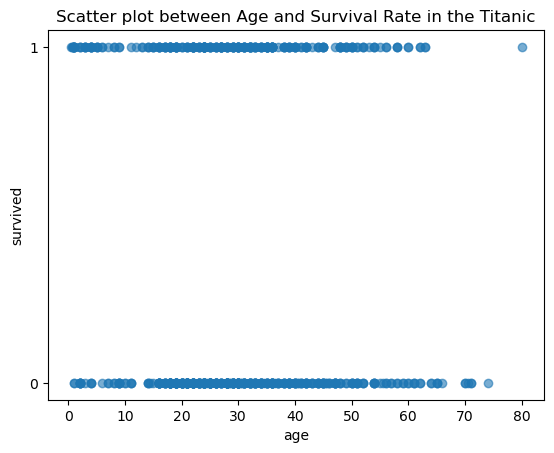

In [104]:
plt.scatter(titanic_data['age'], titanic_data['survived'], alpha = 0.6)
plt.xlabel('age')
plt.ylabel('survived')
plt.title('Scatter plot between Age and Survival Rate in the Titanic')
plt.show()

#### Other options

Matplotlib and seaborn also allow you to do some level of customization. 
Read the documents here to change color/size/shape for your plot. Save your work to submit to the quiz later. 

https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html


### Conclusion

- One categorical: bar plot
- One continous: histogram/density plot/boxplot
- Two continous: scatter plot
- One categorical and one continous: side-by-side boxplot
- Two categorical: side-by-side bar plot

But, wait, why?

In-class activities: discuss what other options you want to have for your plots?